In [1]:
#Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Dataset
data = pd.read_excel("data_jobs_salary.xlsx")

In [3]:
#To view the Top 5 rows of the data
data.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",via ZipRecruiter,Full-time,False,Sudan,2023-04-24 09:51:15,False,True,Sudan,year,128050.0,NaN,Cox Communications,"['sql', 'python', 'aws', 'pyspark', 'tableau',..."
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",via Indeed,Full-time,False,Georgia,2023-03-13 12:51:23,True,True,United States,year,140000.0,NaN,Worldgate LLC,"['sql', 'nosql', 'java', 'python', 'kafka', 's..."
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",via ZipRecruiter,Full-time,False,"New York, United States",2023-07-05 07:03:38,True,False,United States,year,156000.0,NaN,National Technical Information Service,NaN
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13 16:05:41,False,True,United States,year,140000.0,NaN,Bosch Group,"['pytorch', 'tensorflow']"
4,Data Scientist,"Data Scientist, AWS","Irving, TX",via Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15 06:02:51,False,False,United States,hour,NaN,39.795002,"Presidio, Inc.","['python', 'r', 'sql', 'c', 'aws', 'gcp', 'big..."


In [4]:
#To view the overall info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32672 entries, 0 to 32671
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        32672 non-null  object        
 1   job_title              32672 non-null  object        
 2   job_location           32317 non-null  object        
 3   job_via                32662 non-null  object        
 4   job_schedule_type      32531 non-null  object        
 5   job_work_from_home     32672 non-null  bool          
 6   search_location        32672 non-null  object        
 7   job_posted_date        32672 non-null  datetime64[ns]
 8   job_no_degree_mention  32672 non-null  bool          
 9   job_health_insurance   32672 non-null  bool          
 10  job_country            32672 non-null  object        
 11  salary_rate            32672 non-null  object        
 12  salary_year_avg        22036 non-null  float64       
 13  s

In [5]:
#To gain the overall statistical inferences(only for numeric data)
round(data.describe(),2)

,salary_year_avg,salary_hour_avg
count,22036.00,10636.00
mean,123192.04,47.03
std,48239.19,21.85
min,15000.00,8.00
25%,90000.00,27.50
50%,115000.00,46.00
75%,150000.00,61.16
max,960000.00,391.00


In [6]:
#To analyze the column, first we need to have all the column names
data.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills'],
      dtype='object')

## Data Preprocessing

In [7]:
#To find the number of null values in each column
data.isna().sum()

job_title_short              0
job_title                    0
job_location               355
job_via                     10
job_schedule_type          141
job_work_from_home           0
search_location              0
job_posted_date              0
job_no_degree_mention        0
job_health_insurance         0
job_country                  0
salary_rate                  0
salary_year_avg          10636
salary_hour_avg          22036
company_name                 0
job_skills                3187
dtype: int64

### 1. job_title_short VS job_title --> this is redundant Columns

In [8]:
print(data['job_title_short'].value_counts())

Data Analyst                 9606
Data Scientist               8495
Data Engineer                6783
Senior Data Engineer         2014
Senior Data Scientist        2009
Senior Data Analyst          1484
Business Analyst             1001
Machine Learning Engineer     621
Software Engineer             573
Cloud Engineer                 86
Name: job_title_short, dtype: int64


In [9]:
print(data['job_title'].value_counts())

Data Analyst                                                2375
Data Scientist                                              2083
Data Engineer                                               1929
Senior Data Engineer                                         910
Senior Data Scientist                                        655
                                                            ... 
Manager, Software Engineer, Data Science                       1
Staff Accountant                                               1
Associate Data Scientist (San Diego, CA)                       1
Staff Software Engineer - SAP Data Integration                 1
Data Science Product Manager - Recommendations - Core AI       1
Name: job_title, Length: 15285, dtype: int64


#### Like we can observe that the job_title_short is categorised more precision than job_title, which is very random in nature.

In [10]:
#So let's remove the "job_title" column
data.drop(columns=['job_title'], inplace = True)

### 2. Salary_year_avg vs Salary_hour_avg -> Output Label

In [11]:
data['final_salary'] = data['salary_year_avg']
# Fill missing annual salaries using hourly conversion
mask = data['salary_year_avg'].isnull() & data['salary_hour_avg'].notnull()
data.loc[mask, 'final_salary'] = data.loc[mask, 'salary_hour_avg'] * 2080 # 40 hr/week * 52 weeks/year

In [12]:
data['final_salary'] = data['final_salary'].round(2)
data.drop(columns=['salary_year_avg','salary_hour_avg','salary_rate'],inplace = True)
#All these columns are of now since we combined all of these as a single feature final_salary

### 3. Job Location Column

In [13]:
all_location = data['job_location'].value_counts().reset_index()

In [14]:
all_location.columns = ['Location', 'Count']
print(all_location.to_string())

                                                                  Location  Count
0                                                                 Anywhere   5960
1                                                             New York, NY   1339
2                                                        San Francisco, CA    656
3                                                              Atlanta, GA    642
4                                                            United States    591
5                                                               Austin, TX    559
6                                                           Washington, DC    544
7                                                              Chicago, IL    506
8                                                            Charlotte, NC    457
9                                                               Dallas, TX    432
10                                                         Los Angeles, CA    431
11              

In [15]:
#Feature selection based on Mutual information
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Filter rows with both salary and location present
subset = data[data['job_location'].notnull() & data['final_salary'].notnull()]

# Encode location
le = LabelEncoder()
encoded_loc = le.fit_transform(subset['job_location'])

# Calculate MI score
mi_score = mutual_info_regression(encoded_loc.reshape(-1, 1), subset['final_salary'])
print(f"MI Score: {mi_score[0]:.4f}")

MI Score: 0.0597


#### Very weak relation so we can eliminate this column since it will have very little impact on prediction

In [16]:
data.drop(columns=['job_location'],inplace=True)

### 4. Remove Irrelevant columns which is of no use

In [17]:
data.drop(columns=['job_via','job_posted_date','search_location'],inplace=True)

### 5. Adding Experience column based on job_title_short

In [18]:
def experience_level(title):
    title = title.lower()
    if "senior" in title:
        return "Senior"
    elif title in ['cloud engineer', 'software engineer', 'business analyst', 'data analyst']:
        return "Junior"
    else:
        return 'Mid'

In [19]:
data['Experience_Level'] = data['job_title_short'].apply(experience_level)

### 6. Cleansing the job_schedule_type column

In [20]:
def clean_schedule_type(type):
    type = str(type).lower()
    if "internship" in type:
        return "Intership"
    elif any(key in type for key in ['contractor','temp work','per diem']):
        return "Contractor"
    elif "part-time" in type:
        return "Part-Time"
    elif "full-time" in type:
        return "Full-Time"
    else:
        return "Other"

In [21]:
data['job_schedule_type_cleaned'] = data['job_schedule_type'].apply(clean_schedule_type)

In [22]:
data.drop(columns='job_schedule_type',inplace = True)

### 7. Do we need to include company_name column?

In [23]:
all_company = data['company_name'].value_counts().reset_index()

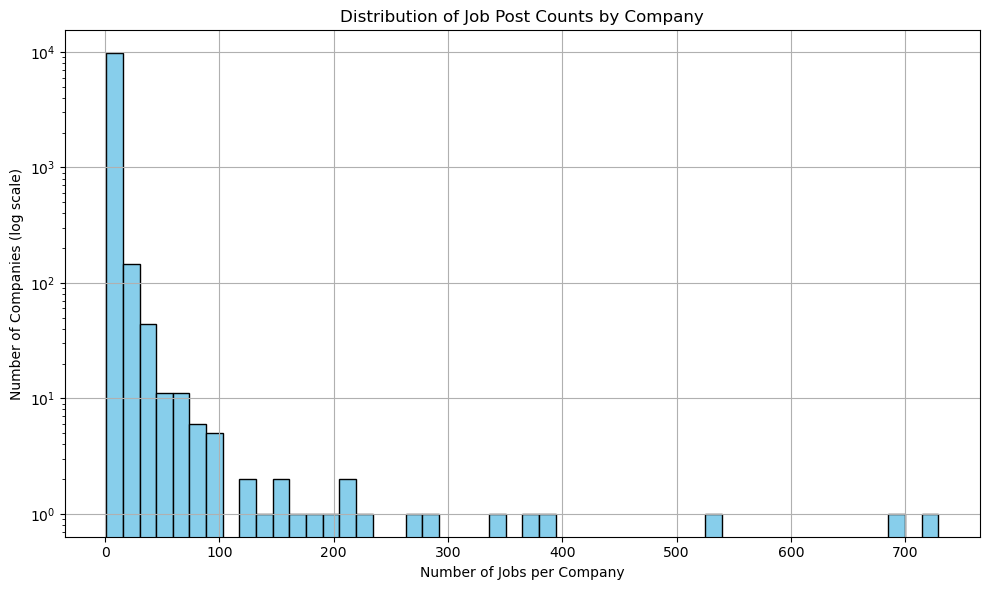

In [25]:
# Step 1: Get value counts of company names
company_counts = data['company_name'].value_counts()

# Step 2: Plot histogram of frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(company_counts, bins=50, color='skyblue', edgecolor='black', log=True)

plt.title('Distribution of Job Post Counts by Company')
plt.xlabel('Number of Jobs per Company')
plt.ylabel('Number of Companies (log scale)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### From the graph this column, have very high cardinality(unique values) -> Better to drop this column to avoid overfitting

In [26]:
data.drop(columns=['company_name'], inplace=True)

### 8. job_skills columns needs to be altered for our usecase!!

In [27]:
data['job_skills'].isna().value_counts()

False    29485
True      3187
Name: job_skills, dtype: int64

### 9. Identify and Remove the Outliers

In [28]:
data.info()
#Using .info() we found that final_salary is the only numeric column present here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32672 entries, 0 to 32671
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   job_title_short            32672 non-null  object 
 1   job_work_from_home         32672 non-null  bool   
 2   job_no_degree_mention      32672 non-null  bool   
 3   job_health_insurance       32672 non-null  bool   
 4   job_country                32672 non-null  object 
 5   job_skills                 29485 non-null  object 
 6   final_salary               32672 non-null  float64
 7   Experience_Level           32672 non-null  object 
 8   job_schedule_type_cleaned  32672 non-null  object 
dtypes: bool(3), float64(1), object(5)
memory usage: 1.6+ MB


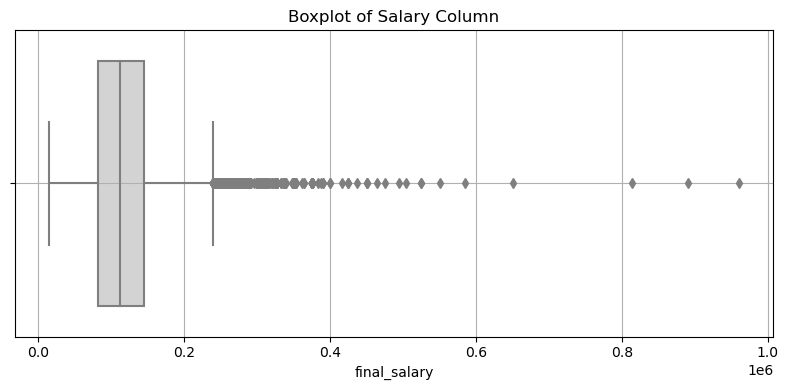

In [29]:
# Define the boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x = data['final_salary'], color = 'lightgray')
plt.title('Boxplot of Salary Column')
plt.grid(True)
plt.style.use('ggplot') 
plt.tight_layout()
plt.show()

In [30]:
# Interquartile Range (IQR) method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

In [31]:
outliers = detect_outliers(data, 'final_salary')
print(f'Found {len(outliers)} outliers in final_salary column')

Found 500 outliers in final_salary column


<Axes: xlabel='Experience_Level', ylabel='final_salary'>

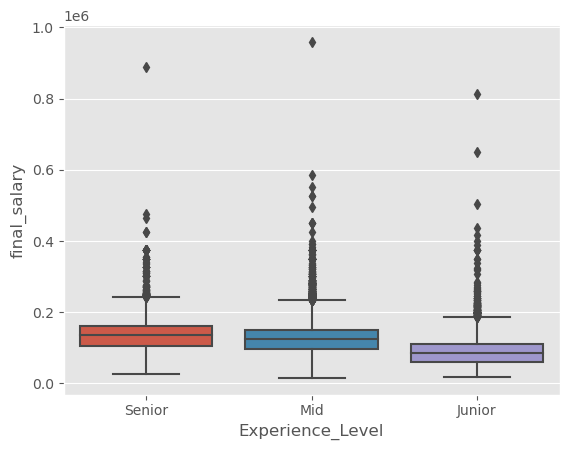

In [32]:
sns.boxplot(x=data['Experience_Level'], y=data['final_salary'])

In [33]:
# Like the Senior Level will earn more so we can't consider them as outliers.
outliers = outliers[outliers['Experience_Level'] != "Senior"]

In [34]:
Juniors = outliers[outliers['Experience_Level']=="Junior"]
Juniors['final_salary'].value_counts()

375000.0    5
240000.0    3
245000.0    2
350000.0    2
260000.0    2
307710.0    1
257500.0    1
257920.0    1
249600.0    1
387460.0    1
267000.0    1
813280.0    1
270400.0    1
280000.0    1
320000.0    1
416000.0    1
245500.0    1
260775.0    1
436800.0    1
650000.0    1
322400.0    1
285000.0    1
317000.0    1
504400.0    1
275600.0    1
265000.0    1
336500.0    1
255829.5    1
400000.0    1
254000.0    1
Name: final_salary, dtype: int64

In [35]:
#To Remove the Junior outliers
data.drop(Juniors.index, inplace=True)

In [36]:
#Analysing the Mid level Emloyers
Mid = outliers[outliers['Experience_Level']=="Mid"]
#So here we will IQR Method to extreme low and high within this Mid level Experienced Candidate.
#Calculating IQR
Q1 = Mid['final_salary'].quantile(0.25)
Q3 = Mid['final_salary'].quantile(0.75)
IQR = Q3 - Q1
# threshold values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the Mid Dataframe with extreme outliers
Mid = Mid[(Mid['final_salary'] < lower_bound) | (Mid['final_salary'] > upper_bound)]

#remove those outliers from my data
data.drop(Mid.index, inplace = True)

## The target column is skewed or not??

In [37]:
skew_value = data['final_salary'].skew()
print(f"Skewness of final_salary: {skew_value}")

Skewness of final_salary: 1.0743071458903293


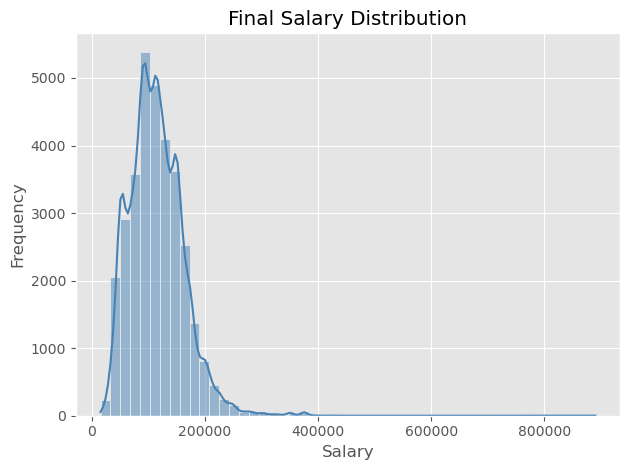

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['final_salary'], bins=50, kde=True, color='steelblue')
plt.title("Final Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
#We can see the the target is right skewed

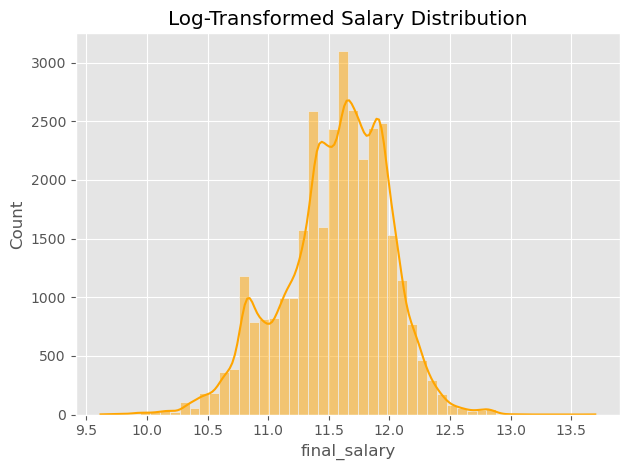

In [39]:
# Apply Log Transformation
import numpy as np

data['final_salary'] = np.log1p(data['final_salary'])

sns.histplot(data['final_salary'], bins=50, kde=True, color='orange')
plt.title("Log-Transformed Salary Distribution")
plt.tight_layout()
plt.show()
# Now the plot looks like normally distributed and not skewed.

## Splitting the Data into test and train Data

In [40]:
# Splitting the Data into input features and Target features
x = data.drop(columns=['final_salary'])
y = data['final_salary']

In [41]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## Encoding the Data

### 1. job_skills - MultiLabelBinarizer

In [42]:
#We will be using Multi-Label-Binarizer to gain useful info from this job_skills column
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [43]:
import re
import ast

def fix_skills_format(skill_str):
    # Add quotes around each word and remove unwanted characters
    skill_str = re.sub(r"([\w\-+]+)", r"'\1'", skill_str)
    skill_str = "[" + ", ".join(re.findall(r"'[^']+'", skill_str)) + "]"
    return ast.literal_eval(skill_str)

x_train['job_skills'] = x_train['job_skills'].fillna("[]").apply(fix_skills_format)
x_test['job_skills'] = x_test['job_skills'].fillna("[]").apply(fix_skills_format)

In [44]:
skills_matrix_train = mlb.fit_transform(x_train['job_skills'])
skills_matrix_test = mlb.transform(x_test['job_skills'])
print(mlb.classes_)#Returns the skill names

[', ' 'access' 'airflow' 'airtable' 'alteryx' 'angular' 'ansible' 'apl'
 'arch' 'asana' 'asp' 'assembly' 'atlassian' 'aurora' 'aws' 'azure' 'bash'
 'basic' 'bi' 'bigquery' 'bitbucket' 'blazor' 'c' 'c++' 'cassandra'
 'centos' 'chainer' 'chef' 'clickup' 'clojure' 'cloud' 'cobol'
 'codecommit' 'cognos' 'colocation' 'com' 'confluence' 'cordova' 'core'
 'couchbase' 'couchdb' 'crystal' 'css' 'dart' 'databricks' 'datarobot'
 'dax' 'db2' 'debian' 'delphi' 'digitalocean' 'django' 'docker' 'dplyr'
 'drupal' 'dynamodb' 'elasticsearch' 'electron' 'elixir' 'erlang' 'excel'
 'express' 'face' 'fastapi' 'fastify' 'firebase' 'firestore' 'flask'
 'flow' 'flutter' 'fortran' 'gatsby' 'gcp' 'gdpr' 'ggplot2' 'git' 'github'
 'gitlab' 'go' 'golang' 'graphql' 'groovy' 'hadoop' 'haskell' 'heroku'
 'homebrew' 'html' 'hugging' 'ibm' 'java' 'javascript' 'jenkins' 'jira'
 'jquery' 'js' 'julia' 'jupyter' 'kafka' 'kali' 'keras' 'kotlin'
 'kubernetes' 'laravel' 'linux' 'lisp' 'lists' 'looker' 'lua' 'macos'
 'mariadb' 

S:\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) ['suse'] will be ignored
  warnings.warn(


In [45]:
#To frame the Dataframe
skills_df_train = pd.DataFrame(skills_matrix_train, columns=mlb.classes_, index=x_train.index)
skills_df_test = pd.DataFrame(skills_matrix_test, columns=mlb.classes_, index=x_test.index)

In [46]:
x_train = pd.concat([x_train, skills_df_train], axis=1)
x_test = pd.concat([x_test, skills_df_test], axis=1)

In [47]:
x_train.drop(columns=['job_skills'],inplace = True)
x_test.drop(columns=['job_skills'],inplace = True)

In [48]:
x_train.drop(columns=[', '], errors='ignore',inplace = True)
x_test.drop(columns=[', '], errors='ignore',inplace = True)

### 2. job_title_short - Frequency Encoding approach

In [49]:
#Creating Frequency Map
freq_map_train = x_train['job_title_short'].value_counts().to_dict()
# Replace the title with these count values
x_train['job_title_short'] = x_train['job_title_short'].map(freq_map_train)
x_test['job_title_short'] = x_test['job_title_short'].map(freq_map_train)  # uses training frequencies

In [50]:
# This leads to data leakage so use training frequency map itself to map the data
"""freq_map_test = x_test['job_title_short'].value_counts().to_dict()
x_test['job_title_short'] = x_test['job_title_short'].map(freq_map_test)"""

"freq_map_test = x_test['job_title_short'].value_counts().to_dict()\nx_test['job_title_short'] = x_test['job_title_short'].map(freq_map_test)"

### 3. job_city column - Frequency Encoding

In [51]:
country_freq_train = x_train['job_country'].value_counts().to_dict()
x_train['job_country'] = x_train['job_country'].map(country_freq_train)
x_test['job_country'] = x_test['job_country'].map(country_freq_train)
#To fill NaN values data in test(if it can mapped to values in test)
x_test['job_country'] = x_test['job_country'].fillna(0)

### 4. job_schedule_type column - One hot Encoding

In [52]:
x_train = pd.get_dummies(x_train, columns=['job_schedule_type_cleaned'], drop_first=True) # drop_first helps in avoiding multi collinearity
# We are capturing the columns in this x_train and apply it on the test as well, since model expects the same one in train
train_cols = x_train.columns
x_test = pd.get_dummies(x_test, columns=['job_schedule_type_cleaned'], drop_first=True)
x_test = x_test.reindex(columns=train_cols, fill_value = 0)

### 5. Experience Column - Ordinal Encoding

In [53]:
# Order matters here
level_map = {
    'Junior': 0,
    'Mid': 1,
    'Senior': 2
}
x_train['Experience_Level'] = x_train['Experience_Level'].map(level_map)
x_test['Experience_Level'] = x_test['Experience_Level'].map(level_map).fillna(-1)

### 6. Handling bool Columns

In [54]:
binary_cols = ['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']
x_train[binary_cols] = x_train[binary_cols].astype(int)
x_test[binary_cols] = x_test[binary_cols].astype(int)

### 7. Checking skewness for y_train

In [55]:
y_train.skew()  # We already peformed log transformation

-0.44970739552882055

### 8. Applying Standardization

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
# Columns to be scaled
scale_cols = ['job_title_short','job_country']
# Apply Scaling on the selected columns
x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = scaler.transform(x_test[scale_cols])

## Model Training and Evaluation

In [59]:
import sys
!{sys.executable} -m pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/150.0 MB ? eta -:--:--
                                              0.0/150.0 MB ? eta -:--:--
                                            0.0/150.0 MB 393.8 kB/s eta 0:06:21
                                              0.1/150.0 MB 1.1 MB/s eta 0:02:17
                                              0.1/150.0 MB 1.1 MB/s eta 0:02:17
                                              0.2/150.0 MB 1.1 MB/s eta 0:02:22
                                              0.2/150.0 MB 1.1 MB/s eta 0:02:22
                                              0.4/150.0 MB 1.2 MB/s eta 0:02:08
                                              0.4/150.0 MB 1.1 MB/s eta 0:02:15
                                              0.6/150.0 MB 1.4 MB/s eta 0:01:48
                                              0.6/150.0 MB 1.4 MB/s eta 0:01:48
                                              0.7/150.0 

In [61]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [62]:
# The Top Models which can be used for this usecase
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [63]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # If you predicted log_salary, convert back
    y_pred_actual = np.expm1(y_pred)
    y_test_actual = np.expm1(y_test)
    
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    r2 = r2_score(y_test_actual, y_pred_actual)
    
    results.append({
        "Model": name,
        "MAE": round(mae, 2),
        "R2 Score": round(r2, 4)
    })

In [64]:
# Display results
df_results = pd.DataFrame(results)
print(df_results.sort_values(by="R2 Score", ascending=False))

               Model       MAE  R2 Score
2      Random Forest  27879.00    0.3139
3            XGBoost  28593.51    0.3037
1   Ridge Regression  31164.20    0.1940
0  Linear Regression  31179.08    0.1932


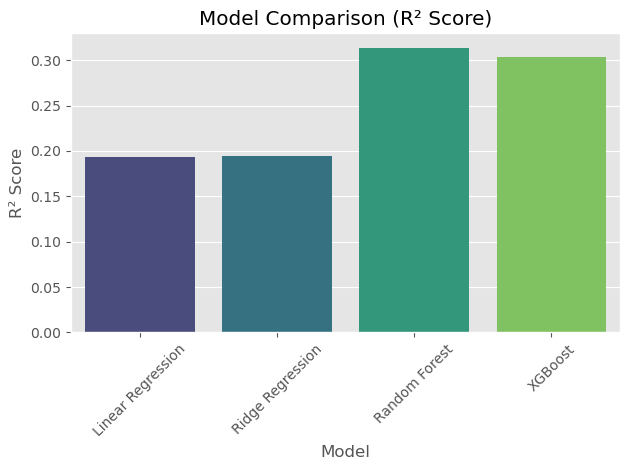

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_results, x='Model', y='R2 Score', palette='viridis')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [66]:
# The models using Random Forest and XGBoost outperform other two techniques
# So we can use hyperparamter tuning on these two methods
# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 250],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 0.8, 1.0]
}

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Grid Search Example
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, 
                    scoring='r2', cv=3, n_jobs=-1)
grid.fit(x_train, y_train)

# Random Search Example
random = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_grid_xgb,
                            n_iter=20, scoring='r2', cv=3, n_jobs=-1, random_state=42)
random.fit(x_train, y_train)

# Best Model
best_model = grid.best_estimator_  


In [68]:
best_model_XG = random.best_estimator_

In [69]:
best_model 

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=300)

In [70]:
best_model_XG

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=None, num_parallel_tree=None, ...)

In [71]:
# Defining the original Model
# Random Forest
best_rf = RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=300)

# XGBoost
best_xgb = XGBRegressor(learning_rate=0.1, max_depth=9, n_estimators=250)

In [73]:
# Let's train the model - For Random Forest
best_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=300)

In [72]:
# Let's train the model - For XGB
best_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=None, num_parallel_tree=None, ...)

In [74]:
# Predict using the model
y_pred_rf = best_rf.predict(x_test)
y_pred_xgb = best_xgb.predict(x_test)

In [76]:
# The Target is log transformed to avoid skewness, so converting it back
y_pred_actual_rf = np.expm1(y_pred_rf)
y_pred_actual_xgb = np.expm1(y_pred_xgb)
y_test_actual = np.expm1(y_test)

In [77]:
# To evaluate PErformance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n {model_name} Performance:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")

In [78]:
evaluate(y_test_actual, y_pred_actual_rf, "Random Forest")
evaluate(y_test_actual, y_pred_actual_xgb, "XGBoost")


 Random Forest Performance:
MAE:  28224.94
RMSE: 38663.21
R²:   0.3178
MAPE: 28.57%

 XGBoost Performance:
MAE:  28003.14
RMSE: 38398.27
R²:   0.3271
MAPE: 28.43%


## How to Evalate these Performnace Metrics
#### 1. MAE - Mean Absolute Error - Should be as low as possible
#### 2. RMSE - Root Mean Sqaure Error - Should be as low as possible
#### 3. R2 - Closer to 1 is better
#### 4. MAPE - Lower is better

In [ ]:
### XGBoost Regressor - Slight better overall PErformance

In [107]:
# Let's make it work when user inputs the values
def preprocess_input(user_input_dict):
    # Convert to DataFrame
    #df = pd.DataFrame([user_input_dict])
    df = pd.json_normalize(user_input_dict)
    # Ensure job_skills is treated as a proper list column

    # Multi-label encoding (skills)
    import re
    import ast

    def sanitize_skills(skill_str):
        if isinstance(skill_str, list):
            # Already a list — sanitize each item
            return [str(skill).strip().lower() for skill in skill_str]

        if not isinstance(skill_str, str):
            return []  # handle None or unexpected types

        # Remove brackets if present (e.g. "[Excel, SQL]")
        skill_str = skill_str.strip().replace("[", "").replace("]", "")

        # Add quotes around each word-like token
        skill_str = re.sub(r"([\w\-+]+)", r"'\1'", skill_str)

        # Extract all quoted tokens
        tokens = re.findall(r"'[^']+'", skill_str)

        # Convert to lowercase list
        return [token.strip("'").lower() for token in tokens]
    
    df['job_skills'] = df['job_skills'].fillna("[]").apply(sanitize_skills)

    # Multi-label encoding
    skills_matrix = mlb.transform(df['job_skills'])
    skills_df = pd.DataFrame(skills_matrix, columns=mlb.classes_)
    skills_df = skills_df.reindex(columns=mlb.classes_, fill_value=0)
    df = pd.concat([df, skills_df], axis=1)
    df.drop(columns=['job_skills'], inplace=True)
    
    # Frequency encoding
    df['job_title_short'] = df['job_title_short'].map(freq_map_train).fillna(0)
    df['job_country'] = df['job_country'].map(country_freq_train).fillna(0)

    # Ordinal encoding
    df['Experience_Level'] = df['Experience_Level'].map(level_map).fillna(-1).astype(int)

    # One-hot encoding alignment
    df = pd.get_dummies(df, columns=['job_schedule_type_cleaned'], drop_first=True)
    df = df.reindex(columns=train_cols, fill_value=0)

    # Binary flags
    df[binary_cols] = df[binary_cols].astype(int)

    # Scaling
    df[scale_cols] = scaler.transform(df[scale_cols])

    # Final selected columns
    return df  


In [114]:
user_input = {
    'job_title_short': 'Data Analyst',
    'job_country': 'India',
    'job_schedule_type_cleaned': 'Part-Time',
    'Experience_Level': 'Junior',
    'job_skills': ['Excel', 'SQL'],
    'job_work_from_home': True,
    'job_health_insurance': False,
    'job_no_degree_mention':False
}

processed_input = preprocess_input(user_input)
pred_salary_log = best_xgb.predict(processed_input)
predicted_salary = np.expm1(pred_salary_log)[0]

print(f"\n Predicted Salary: ₹{int(predicted_salary):,}")


 Predicted Salary: ₹85,994


In [115]:
data['job_title_short'].value_counts()

Data Analyst                 9581
Data Scientist               8487
Data Engineer                6781
Senior Data Engineer         2014
Senior Data Scientist        2009
Senior Data Analyst          1484
Business Analyst              999
Machine Learning Engineer     621
Software Engineer             562
Cloud Engineer                 85
Name: job_title_short, dtype: int64

In [116]:
data['job_work_from_home'].value_counts()

False    26670
True      5953
Name: job_work_from_home, dtype: int64

In [117]:
data['job_schedule_type_cleaned'].value_counts()

Full-Time     25082
Contractor     5228
Part-Time      1908
Intership       264
Other           141
Name: job_schedule_type_cleaned, dtype: int64

In [118]:
data['job_health_insurance'].value_counts()

False    20410
True     12213
Name: job_health_insurance, dtype: int64

In [120]:
data['job_country'].value_counts()

United States         25102
Sudan                  2676
India                   588
Canada                  503
United Kingdom          285
                      ...  
Benin                     1
Dominican Republic        1
Senegal                   1
Azerbaijan                1
Cambodia                  1
Name: job_country, Length: 111, dtype: int64

'access' 'airflow' 'airtable' 'alteryx' 'angular' 'ansible' 'apl'
 'arch' 'asana' 'asp' 'assembly' 'atlassian' 'aurora' 'aws' 'azure' 'bash'
 'basic' 'bi' 'bigquery' 'bitbucket' 'blazor' 'c' 'c++' 'cassandra'
 'centos' 'chainer' 'chef' 'clickup' 'clojure' 'cloud' 'cobol'
 'codecommit' 'cognos' 'colocation' 'com' 'confluence' 'cordova' 'core'
 'couchbase' 'couchdb' 'crystal' 'css' 'dart' 'databricks' 'datarobot'
 'dax' 'db2' 'debian' 'delphi' 'digitalocean' 'django' 'docker' 'dplyr'
 'drupal' 'dynamodb' 'elasticsearch' 'electron' 'elixir' 'erlang' 'excel'
 'express' 'face' 'fastapi' 'fastify' 'firebase' 'firestore' 'flask'
 'flow' 'flutter' 'fortran' 'gatsby' 'gcp' 'gdpr' 'ggplot2' 'git' 'github'
 'gitlab' 'go' 'golang' 'graphql' 'groovy' 'hadoop' 'haskell' 'heroku'
 'homebrew' 'html' 'hugging' 'ibm' 'java' 'javascript' 'jenkins' 'jira'
 'jquery' 'js' 'julia' 'jupyter' 'kafka' 'kali' 'keras' 'kotlin'
 'kubernetes' 'laravel' 'linux' 'lisp' 'lists' 'looker' 'lua' 'macos'
 'mariadb' 'matlab' 'matplotlib' 'microsoft' 'microstrategy' 'mlr'
 'monday' 'mongo' 'mongodb' 'ms' 'mxnet' 'mysql' 'neo4j' 'net' 'next'
 'nltk' 'no-sql' 'node' 'nosql' 'notion' 'npm' 'nuix' 'numpy'
 'objective-c' 'on' 'opencv' 'openstack' 'oracle' 'outlook' 'pandas'
 'pascal' 'perl' 'phoenix' 'php' 'planner' 'plotly' 'postgresql' 'power'
 'powerpoint' 'powershell' 'pulumi' 'puppet' 'pyspark' 'python' 'pytorch'
 'qlik' 'qt' 'r' 'rails' 'react' 'redhat' 'redis' 'redshift' 'ringcentral'
 'rshiny' 'ruby' 'rust' 'sap' 'sas' 'sass' 'scala' 'scikit-learn'
 'seaborn' 'selenium' 'server' 'sharepoint' 'sheets' 'shell' 'slack'
 'smartsheet' 'snowflake' 'solidity' 'spark' 'splunk' 'spreadsheet'
 'spring' 'spss' 'sql' 'sqlite' 'ssis' 'ssrs' 'svelte' 'svn' 'swift'
 'symphony' 't-sql' 'tableau' 'teams' 'tensorflow' 'terminal' 'terraform'
 'theano' 'tidyverse' 'trello' 'twilio' 'typescript' 'ubuntu' 'unify'
 'unity' 'unix' 'unreal' 'vb' 'vba' 'visio' 'visual' 'vmware' 'vue'
 'watson' 'webex' 'windows' 'wire' 'word' 'workfront' 'wrike' 'xamarin'
 'yarn' 'zoom'
#### All of these in lowercase so ensure the user input are always converted to lowercase

In [123]:
data['Experience_Level'].value_counts()

Mid       15889
Junior    11227
Senior     5507
Name: Experience_Level, dtype: int64

In [124]:
data['job_schedule_type_cleaned'].value_counts()

Full-Time     25082
Contractor     5228
Part-Time      1908
Intership       264
Other           141
Name: job_schedule_type_cleaned, dtype: int64

In [125]:
# Loading necessary data as .pkl files
import joblib

# After training is done:
joblib.dump(best_xgb, "best_xgb_model.pkl")
joblib.dump(freq_map_train, "freq_map_train.pkl")
joblib.dump(country_freq_train, "country_freq_train.pkl")
joblib.dump(level_map, "level_map.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(mlb, "mlb_encoder.pkl")
joblib.dump(x_train.columns.tolist(), "final_model_features.pkl")


['final_model_features.pkl']